In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's look at the data.

In [5]:
data = pd.read_csv('../data/IOTNET24_IDS.csv').drop('Unnamed: 0', axis=1)

data['duration'] = data['duration'] / 60

data.sample(30)

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
15162,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious
17506,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious
15468,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious
655,192.168.1.195,49726,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious
16883,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious
16959,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious
20570,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious
21449,192.168.1.195,29566,71.61.66.148,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,40,0,0,Malicious
14224,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious
16833,192.168.1.195,65279,123.59.209.185,80,tcp,NaN,NaN,NaN,NaN,OTH,0,C,0,0,0,0,Malicious


## Not sure where to start... let's do some histograms.

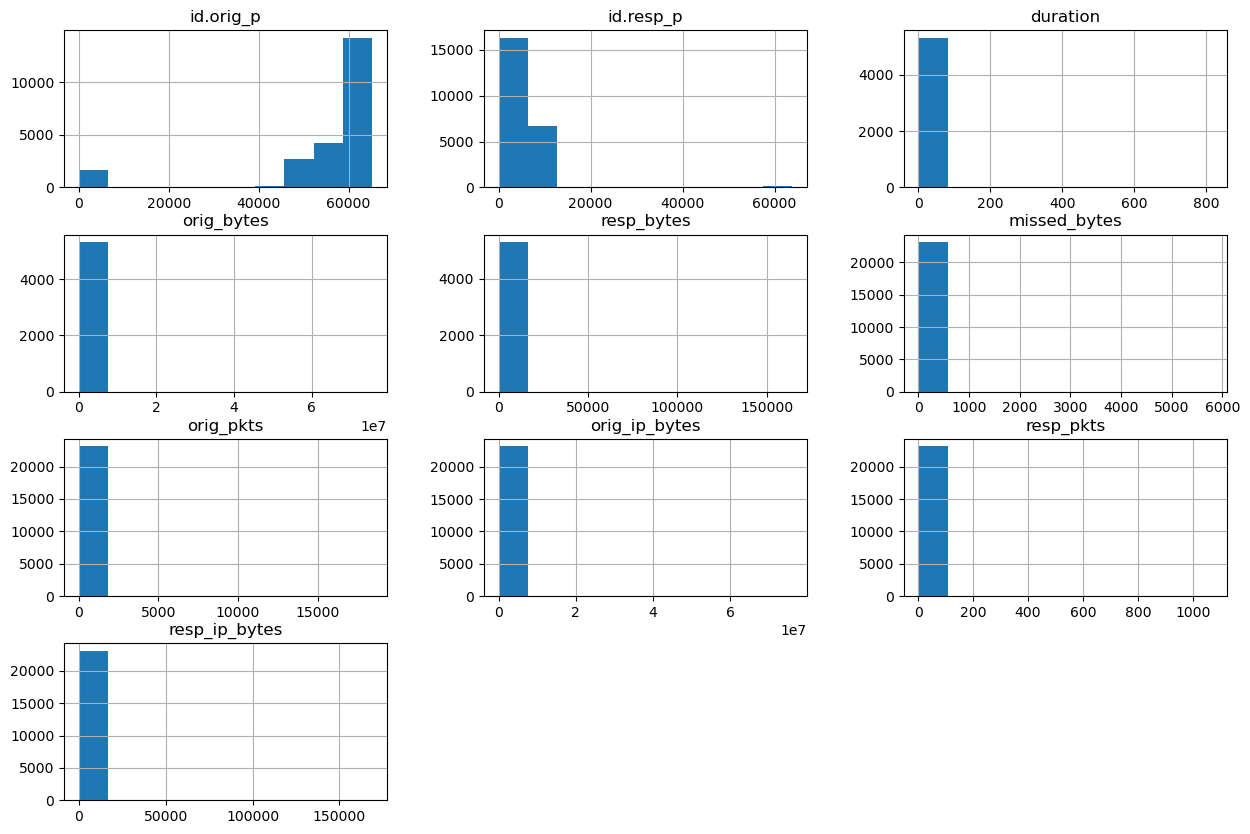

In [6]:
data.hist(figsize=(15, 10))
plt.show()

## Honestly, I only really care about malicious data so...

In [7]:
malicious_data = data[data['label'] != 'Benign'].copy()

malicious_data['duration'] = malicious_data['duration'].astype(float)

malicious_data['event_index'] = malicious_data.index

malicious_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,event_index
25,192.168.1.195,48986,185.244.25.235,6667,tcp,NaN,0.051796,0.0,0.0,S0,0,S,3,180,0,0,Malicious,25
48,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,0.051625,0.0,0.0,S0,0,S,3,180,0,0,Malicious,48
50,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,50
52,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,0.052075,0.0,0.0,S0,0,S,3,180,0,0,Malicious,52
54,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,54


### Just in case I want to also view the benign data, let's make a variable for that too.

In [8]:
benign_data = data[data['label'] == 'Benign'].copy()

benign_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,0.052320,0.0,0.0,S0,0,S,3,180,0,0,Benign
1,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
2,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
3,192.168.1.195,41040,185.244.25.235,80,tcp,http,0.024628,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,Benign
4,192.168.1.195,41042,185.244.25.235,80,tcp,NaN,0.052452,0.0,0.0,S0,0,S,3,180,0,0,Benign


### Okay, so now what protocols does malicious data use here.

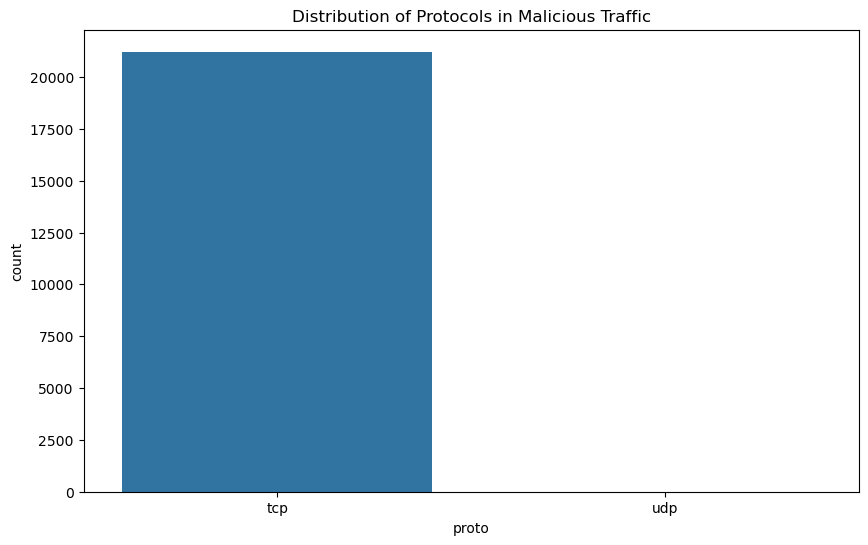

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=malicious_data, x='proto')
plt.title('Distribution of Protocols in Malicious Traffic')
plt.show()


#### Same thing, but let's do benign traffic.

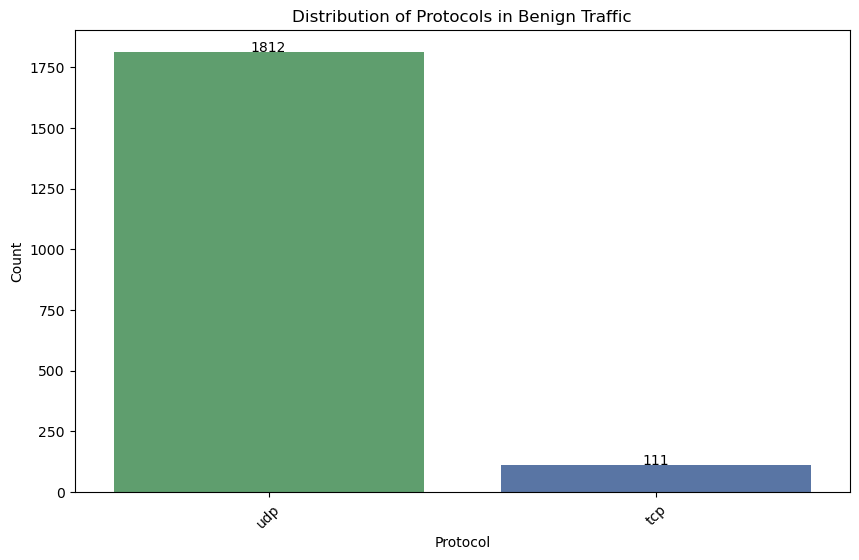

In [10]:
benign_proto_counts = benign_data['proto'].value_counts().reset_index()
benign_proto_counts.columns = ['proto', 'count_benign']

custom_colors = ['#55a868', '#4c72b0']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=benign_proto_counts, x='proto', y='count_benign', palette=custom_colors)
plt.title('Distribution of Protocols in Benign Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, row in benign_proto_counts.iterrows():
    ax.text(row.name, row['count_benign'], round(row['count_benign'], 2), color='black', ha="center")

plt.show()

#### I like the labels in the benign graph, so now let's redo the malicious graph the same way.

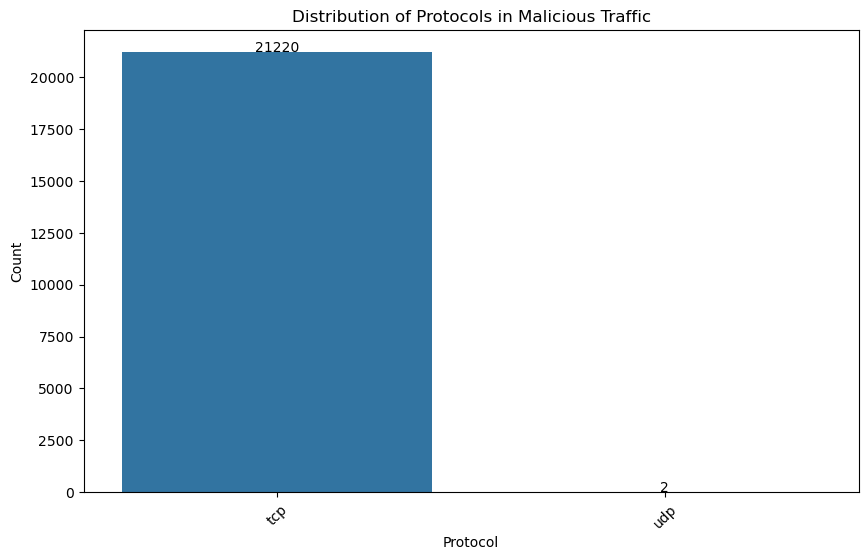

In [11]:
malicious_proto_counts = malicious_data['proto'].value_counts().reset_index()
malicious_proto_counts.columns = ['proto', 'count_malicious']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=malicious_proto_counts, x='proto', y='count_malicious')
plt.title('Distribution of Protocols in Malicious Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, row in malicious_proto_counts.iterrows():
    ax.text(row.name, row['count_malicious'], round(row['count_malicious'], 2), color='black', ha="center")

plt.show()

### If I overlay the two, does it look sensible?

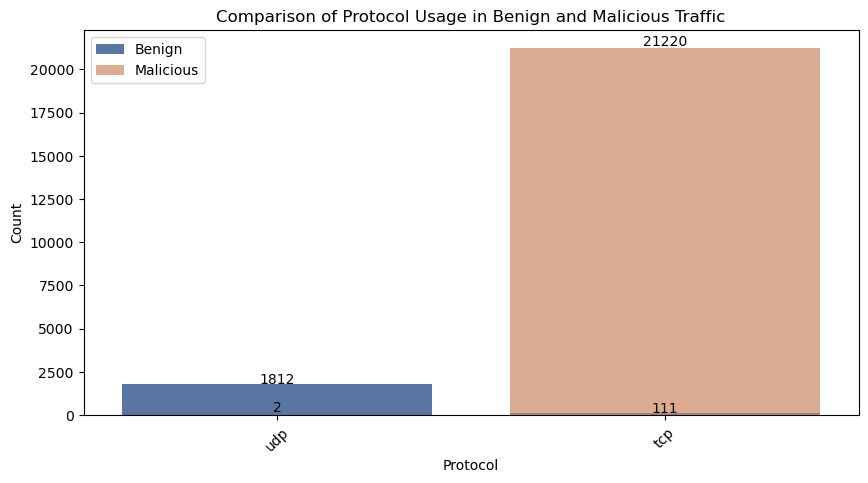

In [12]:
proto_counts = pd.merge(benign_proto_counts, malicious_proto_counts, on='proto', how='outer').fillna(0)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=proto_counts, x='proto', y='count_benign', color='#4c72b0', label='Benign')
ax = sns.barplot(data=proto_counts, x='proto', y='count_malicious', color='#dd8452', label='Malicious', alpha=0.7)

plt.title('Comparison of Protocol Usage in Benign and Malicious Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend()

plt.xticks(rotation=45)

for index, row in proto_counts.iterrows():
    ax.text(row.name, row['count_benign'], int(row['count_benign']), color='black', ha="center")
    ax.text(row.name, row['count_malicious'], int(row['count_malicious']), color='black', ha="center", va='bottom')

plt.show()

### The overlay is okay... maybe a pie chart would show this better.

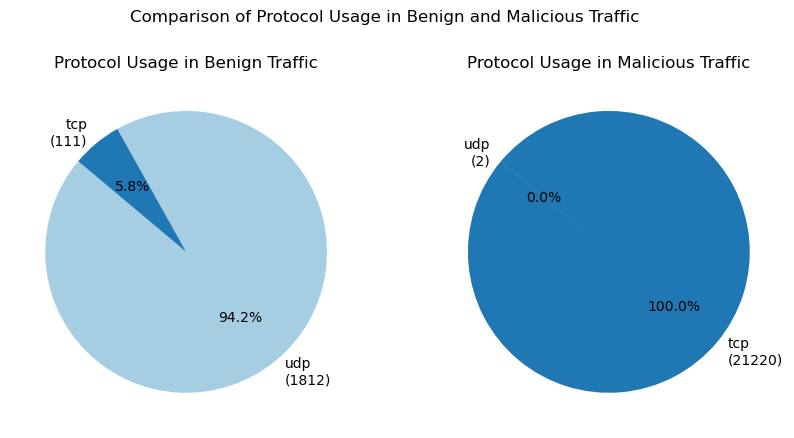

In [13]:
proto_counts = pd.merge(benign_proto_counts, malicious_proto_counts, on='proto', how='outer').fillna(0)
proto_counts.columns = ['proto', 'count_benign', 'count_malicious']

# Prepare data for pie charts
benign_data2 = proto_counts.set_index('proto')['count_benign']
malicious_data2 = proto_counts.set_index('proto')['count_malicious']

# Function to format labels with counts
def format_labels(values):
    total = sum(values)
    return [f'{label}\n({int(value)})' for label, value in zip(values.index, values)]

# Plot the pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for Benign Traffic
axes[0].pie(benign_data2, labels=format_labels(benign_data2), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Protocol Usage in Benign Traffic')

# Pie chart for Malicious Traffic
axes[1].pie(malicious_data2, labels=format_labels(malicious_data2), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Protocol Usage in Malicious Traffic')

plt.suptitle('Comparison of Protocol Usage in Benign and Malicious Traffic')
plt.show()

### Time to move on from the protocol stuff... let's look at the malicious_data dataframe we just made.

In [14]:
malicious_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,event_index
25,192.168.1.195,48986,185.244.25.235,6667,tcp,NaN,0.051796,0.0,0.0,S0,0,S,3,180,0,0,Malicious,25
48,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,0.051625,0.0,0.0,S0,0,S,3,180,0,0,Malicious,48
50,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,50
52,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,0.052075,0.0,0.0,S0,0,S,3,180,0,0,Malicious,52
54,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,54


### Okay, so now I want to know how long each event occurred. It's too bad there isn't a timestamp column, but we can make this work.

I think I could put more in here, maybe the colors of each point on the scatterplot, I'm going to try for the connection states.

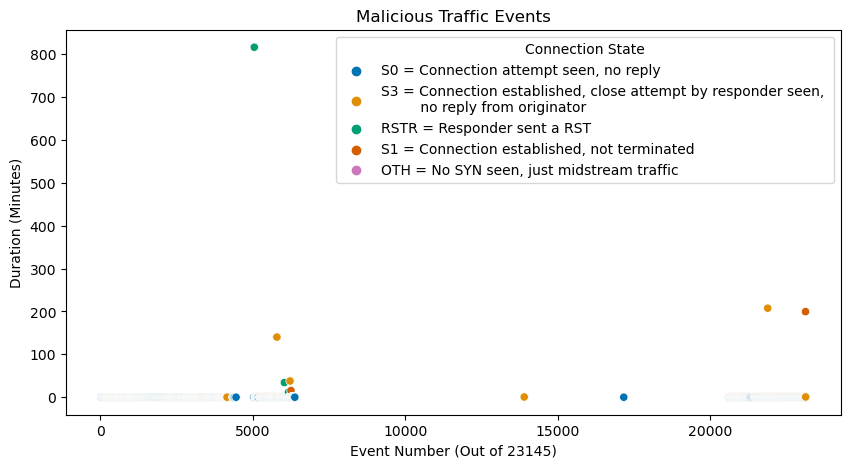

In [15]:
plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=malicious_data, x='event_index', y='duration', palette='colorblind', hue='conn_state', legend='full')
plt.title('Malicious Traffic Events')
plt.xlabel('Event Number (Out of 23145)')
plt.ylabel('Duration (Minutes)')

legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

# Get the current handles and labels
handles, labels = scatter_plot.get_legend_handles_labels()

# Replace the labels with the custom labels
new_labels = [legend_labels.get(label, label) for label in labels]

# Create the custom legend
scatter_plot.legend(handles, new_labels, title='Connection State', loc='upper right')

plt.show()

### It needs labels. The S1 connections and the time in hours of the one over the 800 minute mark are both pretty significant. Keeping the old scatterplot there in case this looks bad or I decide to talk to it first.

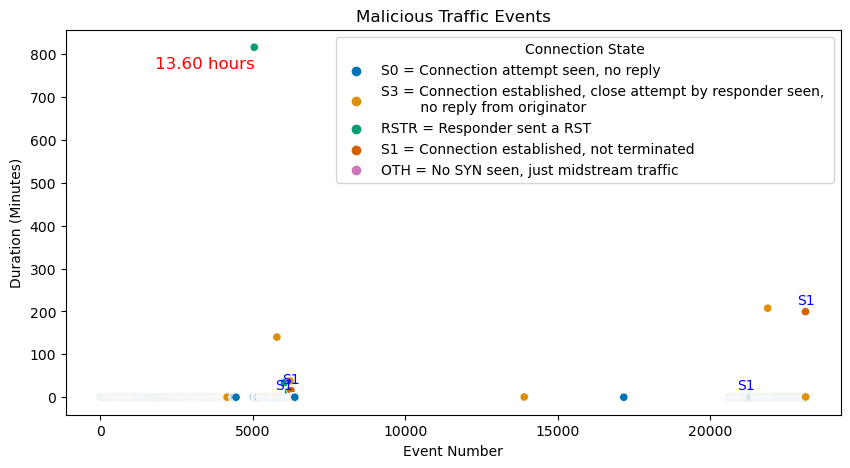

In [16]:
longest_duration_event = malicious_data.loc[malicious_data['duration'].idxmax()]

# Convert the longest duration to hours
longest_duration_hours = longest_duration_event['duration'] / 60

# Filter S1 connections
s1_connections = malicious_data[malicious_data['conn_state'] == 'S1']

plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=malicious_data, x='event_index', y='duration', hue='conn_state', palette='colorblind', legend='full')
plt.title('Malicious Traffic Events')
plt.xlabel('Event Number')
plt.ylabel('Duration (Minutes)')

# Annotate the longest duration event with the duration in hours
plt.text(longest_duration_event['event_index'], longest_duration_event['duration'] - 50,
         f'{longest_duration_hours:.2f} hours', fontsize=12, color='red', ha='right')

# Highlight S1 connections with text annotations
for _, row in s1_connections.iterrows():
    plt.text(row['event_index'], row['duration'] + 10, 'S1', fontsize=10, color='blue', ha='center', va='bottom')

legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

# Get the current handles and labels
handles, labels = scatter_plot.get_legend_handles_labels()

# Replace the labels with the custom labels
new_labels = [legend_labels.get(label, label) for label in labels]

# Create the custom legend
scatter_plot.legend(handles, new_labels, title='Connection State', loc='upper right')

plt.show()

## Now I need to look at the 13 hour event.

In [17]:
longest_duration_event

id.orig_h         192.168.1.195
id.orig_p                 48986
id.resp_h        185.244.25.235
id.resp_p                  6667
proto                       tcp
service                     irc
duration             816.280318
orig_bytes              13115.0
resp_bytes              18031.0
conn_state                 RSTR
missed_bytes                  0
history               ShAdDatfr
orig_pkts                   606
orig_ip_bytes             45630
resp_pkts                  1070
resp_ip_bytes             74159
label                 Malicious
event_index                5050
Name: 5050, dtype: object

In [18]:
longest_duration_event_number = longest_duration_event['event_index']
print(f'The event number for the longest duration data point is: {longest_duration_event_number}')


The event number for the longest duration data point is: 5050


C:\Users\dave9\AppData\Local\Temp\ipykernel_8308\2723284970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['event_index'] = filtered_data.index


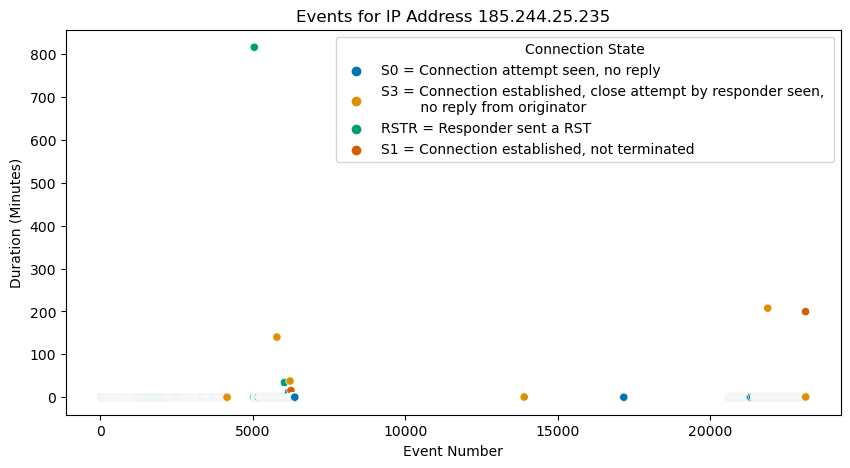

In [19]:
# Filter for events where id.resp_h == '185.244.25.235'
filtered_data = malicious_data[malicious_data['id.resp_h'] == '185.244.25.235']

# Assuming the duration is already in minutes, so no conversion is needed
# Create a column for the index to use as the x-axis
filtered_data['event_index'] = filtered_data.index

# Plot the scatter plot for duration of each event
plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=filtered_data, x='event_index', y='duration', hue='conn_state', palette='colorblind', legend='full')
plt.title('Events for IP Address 185.244.25.235')
plt.xlabel('Event Number')
plt.ylabel('Duration (Minutes)')

# Create the custom legend
legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'SF': 'SF = Normal establishment and termination',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

handles, labels = scatter_plot.get_legend_handles_labels()
new_labels = [legend_labels.get(label, label) for label in labels]
plt.legend(handles, new_labels, title='Connection State', loc='upper right')

plt.show()

### Let's focus on the targetted IP addresses, essentialy the id.resp_h column. First a count of each one.

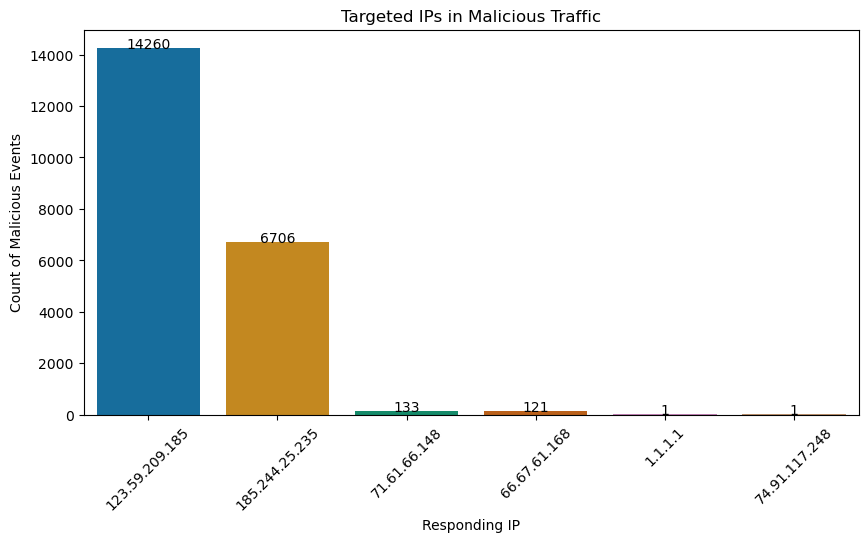

In [20]:
# Assuming the malicious_data DataFrame is already defined and contains the necessary data
malicious_resp_ip_counts = malicious_data['id.resp_h'].value_counts().reset_index()
malicious_resp_ip_counts.columns = ['id.resp_h', 'count']

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(data=malicious_resp_ip_counts.head(20), x='id.resp_h', y='count', palette='colorblind')
plt.title('Targeted IPs in Malicious Traffic')
plt.xlabel('Responding IP')
plt.ylabel('Count of Malicious Events')
plt.xticks(rotation=45)

# Add counts on top of the bars
for index, row in malicious_resp_ip_counts.head(20).iterrows():
    bar_plot.text(index, row['count'], row['count'], color='black', ha="center")

plt.show()

### I like how the count looks, let's do it for the connection state as well.

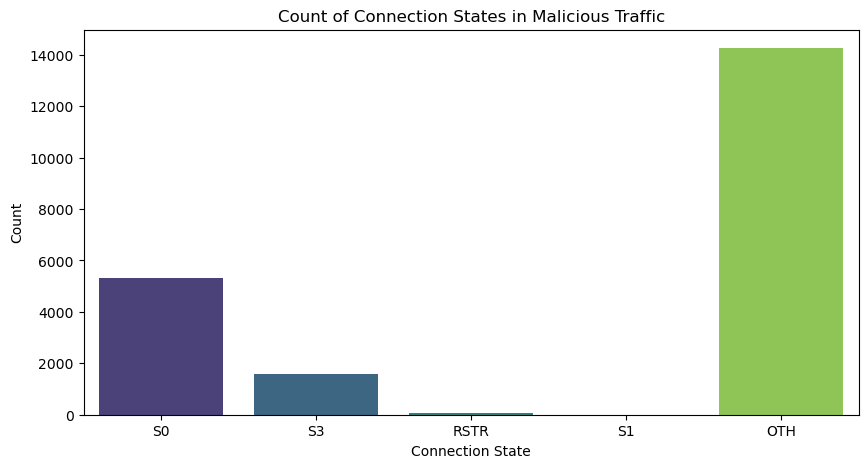

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=malicious_data, x='conn_state', palette='viridis')
plt.title('Count of Connection States in Malicious Traffic')
plt.xlabel('Connection State')
plt.ylabel('Count')
plt.show()

#### This is for the graph below, I need to know the how much data went through the top data point in the scatterplot, so just checking if it's right.

In [22]:
malicious_data['orig_bytes'].max()

75546624.0

### Now, let's look at the amount of data that was sent by the malicious traffic/connection attempts.

c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


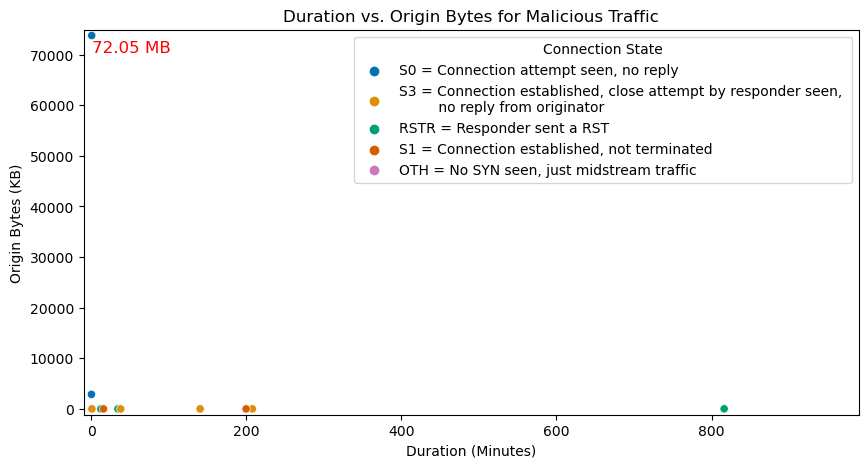

In [23]:
# Assuming malicious_data DataFrame is already defined and contains the necessary data
malicious_data['orig_bytes_kb'] = malicious_data['orig_bytes'] / 1024

# Identify the event with the largest orig_bytes_kb
largest_orig_bytes_event = malicious_data.loc[malicious_data['orig_bytes_kb'].idxmax()]
largest_orig_bytes_mb = largest_orig_bytes_event['orig_bytes_kb'] / 1024

plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=malicious_data, x='duration', y='orig_bytes_kb', hue='conn_state', palette='colorblind', legend='full')
sns.kdeplot(data=malicious_data, x='duration', y='orig_bytes_kb', hue='conn_state', levels=5, fill=True, alpha=0.3)
plt.title('Duration vs. Origin Bytes for Malicious Traffic')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Origin Bytes (KB)')

# Annotate the largest orig_bytes_kb event with the value in megabytes
plt.text(largest_orig_bytes_event['duration'], largest_orig_bytes_event['orig_bytes_kb'] - 1000,
         f'{largest_orig_bytes_mb:.2f} MB', fontsize=12, color='red', ha='left', va='top')

plt.xlim(left=-10)

legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

# Get the current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Replace the labels with the custom labels
new_labels = [legend_labels.get(label, label) for label in labels]

# Create the custom legend
plt.legend(handles, new_labels, title='Connection State', loc='upper right')

plt.show()

#### 74 Mb is interesting. I want to see that row.

In [24]:
data.loc[data['orig_bytes'].idxmax()]



id.orig_h        192.168.1.195
id.orig_p                44924
id.resp_h        74.91.117.248
id.resp_p                 5376
proto                      udp
service                    NaN
duration              0.402136
orig_bytes          75546624.0
resp_bytes                 0.0
conn_state                  S0
missed_bytes                 0
history                      D
orig_pkts                18444
orig_ip_bytes         76063056
resp_pkts                    0
resp_ip_bytes                0
label                Malicious
Name: 21196, dtype: object

C:\Users\dave9\AppData\Local\Temp\ipykernel_8308\1883948582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['event_index'] = filtered_data.index


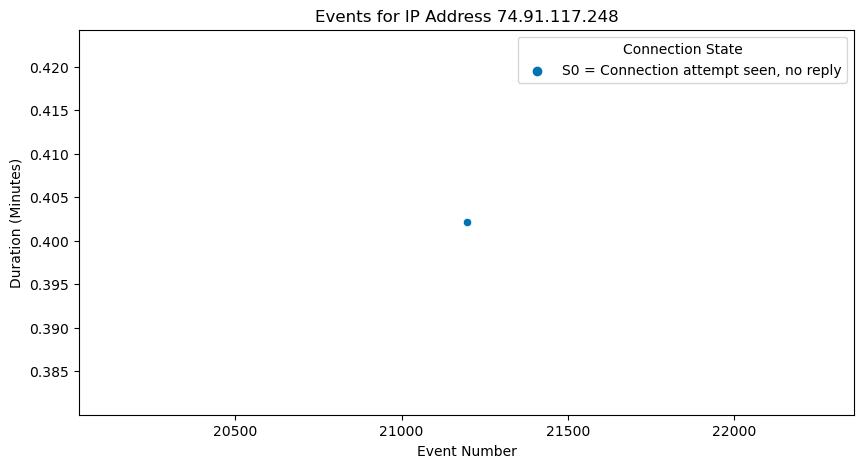

In [25]:
# Filter for events where id.resp_h == '185.244.25.235'
filtered_data = data[data['id.resp_h'] == '74.91.117.248']

# Assuming the duration is already in minutes, so no conversion is needed
# Create a column for the index to use as the x-axis
filtered_data['event_index'] = filtered_data.index

# Plot the scatter plot for duration of each event
plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=filtered_data, x='event_index', y='duration', hue='conn_state', palette='colorblind', legend='full')
plt.title('Events for IP Address 74.91.117.248')
plt.xlabel('Event Number')
plt.ylabel('Duration (Minutes)')

# Create the custom legend
legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'SF': 'SF = Normal establishment and termination',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

handles, labels = scatter_plot.get_legend_handles_labels()
new_labels = [legend_labels.get(label, label) for label in labels]
plt.legend(handles, new_labels, title='Connection State', loc='upper right')

plt.show()

#### I need to do the same things for the responder data as well.

In [26]:
data.loc[data['resp_bytes'].idxmax()]

id.orig_h         192.168.1.195
id.orig_p                 41052
id.resp_h        185.244.25.235
id.resp_p                    80
proto                       tcp
service                    http
duration               0.038324
orig_bytes                151.0
resp_bytes             164266.0
conn_state                   SF
missed_bytes               5792
history             ShADadtctfF
orig_pkts                   114
orig_ip_bytes              6607
resp_pkts                   117
resp_ip_bytes            168910
label                    Benign
Name: 24, dtype: object

In [27]:
malicious_data['resp_bytes'].max()

18031.0

c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dave9\AppData\Local\Temp\ipykernel_8308\4172496586.py:8: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=malicious_data, x='duration', y='resp_bytes_kb', hue='conn_state', levels=5, fill=True, alpha=0.3)


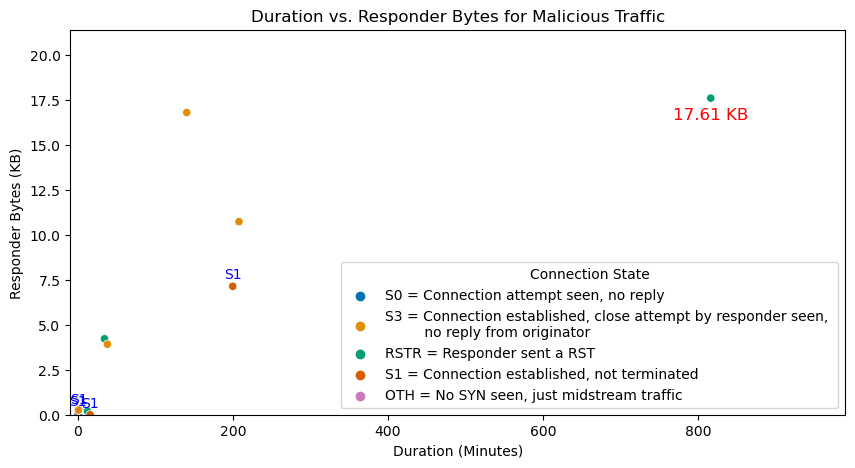

In [28]:
malicious_data['resp_bytes_kb'] = malicious_data['resp_bytes'] / 1024

# Identify the event with the largest resp_bytes_kb
largest_resp_bytes_event = malicious_data.loc[malicious_data['resp_bytes_kb'].idxmax()]

plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=malicious_data, x='duration', y='resp_bytes_kb', hue='conn_state', palette='colorblind', legend='full')
sns.kdeplot(data=malicious_data, x='duration', y='resp_bytes_kb', hue='conn_state', levels=5, fill=True, alpha=0.3)
plt.title('Duration vs. Responder Bytes for Malicious Traffic')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Responder Bytes (KB)')

# Annotate the largest resp_bytes_kb event with the value in kilobytes
plt.annotate(f'{largest_resp_bytes_event["resp_bytes_kb"]:.2f} KB',
             xy=(largest_resp_bytes_event['duration'], largest_resp_bytes_event['resp_bytes_kb']),
             xytext=(largest_resp_bytes_event['duration'], largest_resp_bytes_event['resp_bytes_kb']-0.50),
             fontsize=12, color='red', ha='center', va='top')

s1_connections = malicious_data[malicious_data['conn_state'] == 'S1']
for _, row in s1_connections.iterrows():
    plt.annotate('S1', xy=(row['duration'], row['resp_bytes_kb']), xytext=(row['duration'], row['resp_bytes_kb'] + 0.25),
                 fontsize=10, color='blue', ha='center', va='bottom')

# Set the x-axis to start at 0
plt.xlim(left=-10)
plt.ylim(bottom=0)

legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

# Get the current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Replace the labels with the custom labels
new_labels = [legend_labels.get(label, label) for label in labels]

# Create the custom legend
plt.legend(handles, new_labels, title='Connection State', loc='lower right')

plt.show()

### At this point, I'm not sure where to go. I've done alot of EDA but we can do a pairgrid to see if there's anything new. 

It took a long time to run, so I did the kdeplot and it was able to run the code.

c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, 

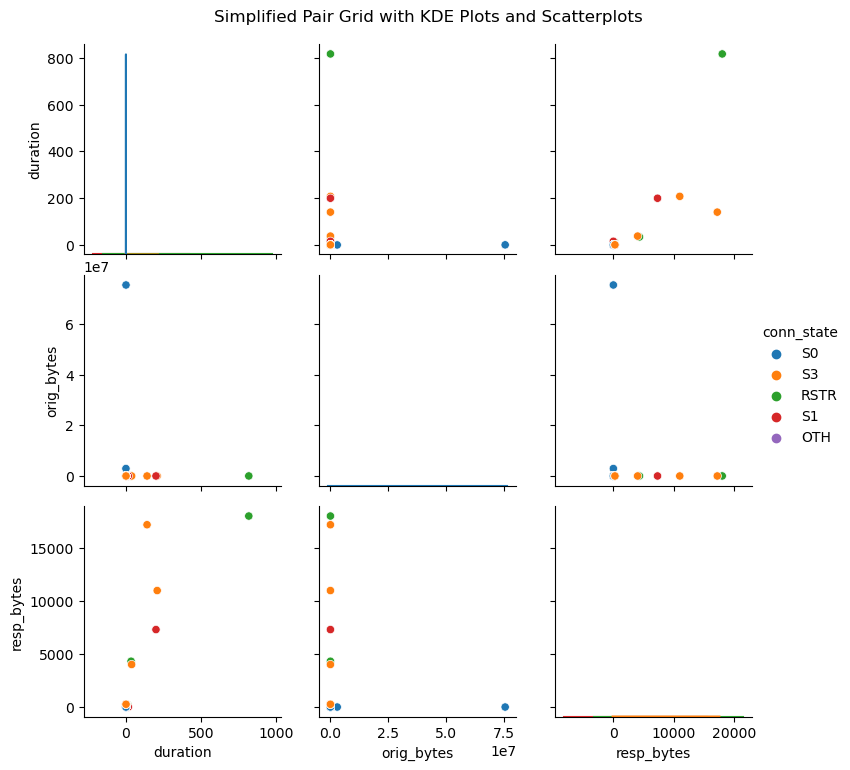

In [29]:
g = sns.PairGrid(malicious_data, vars=['duration', 'orig_bytes', 'resp_bytes'], hue='conn_state')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle('Simplified Pair Grid with KDE Plots and Scatterplots', y=1.02)
plt.show()

#### That's pretty much what I started with, so let's try a correlation matrix.

I had to change some values to binary, then simply dropped columns with multiple string values, to get this to work.

In [30]:
label = {'Malicious': 1,'Benign': 0}
data.label = [label[item] for item in data.label]

In [31]:
protocol = {'tcp': 1,'udp': 0}
data.proto = [protocol[item] for item in data.proto]

In [32]:
data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,1,NaN,0.052320,0.0,0.0,S0,0,S,3,180,0,0,0
1,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0
2,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0
3,192.168.1.195,41040,185.244.25.235,80,1,http,0.024628,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,0
4,192.168.1.195,41042,185.244.25.235,80,1,NaN,0.052452,0.0,0.0,S0,0,S,3,180,0,0,0


In [33]:
cleaned = data.drop(['id.orig_h', 'id.resp_h', 'service', 'conn_state', 'history'], axis=1)
cleaned.head()


,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,41040,80,1,0.052320,0.0,0.0,0,3,180,0,0,0
1,41040,80,1,NaN,NaN,NaN,0,1,60,0,0,0
2,41040,80,1,NaN,NaN,NaN,0,1,60,0,0,0
3,41040,80,1,0.024628,149.0,128252.0,2896,94,5525,96,139044,0
4,41042,80,1,0.052452,0.0,0.0,0,3,180,0,0,0


c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'id.orig_p'),
  Text(1.5, 0, 'id.resp_p'),
  Text(2.5, 0, 'proto'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'orig_bytes'),
  Text(5.5, 0, 'resp_bytes'),
  Text(6.5, 0, 'missed_bytes'),
  Text(7.5, 0, 'orig_pkts'),
  Text(8.5, 0, 'orig_ip_bytes'),
  Text(9.5, 0, 'resp_pkts'),
  Text(10.5, 0, 'resp_ip_bytes'),
  Text(11.5, 0, 'label')])

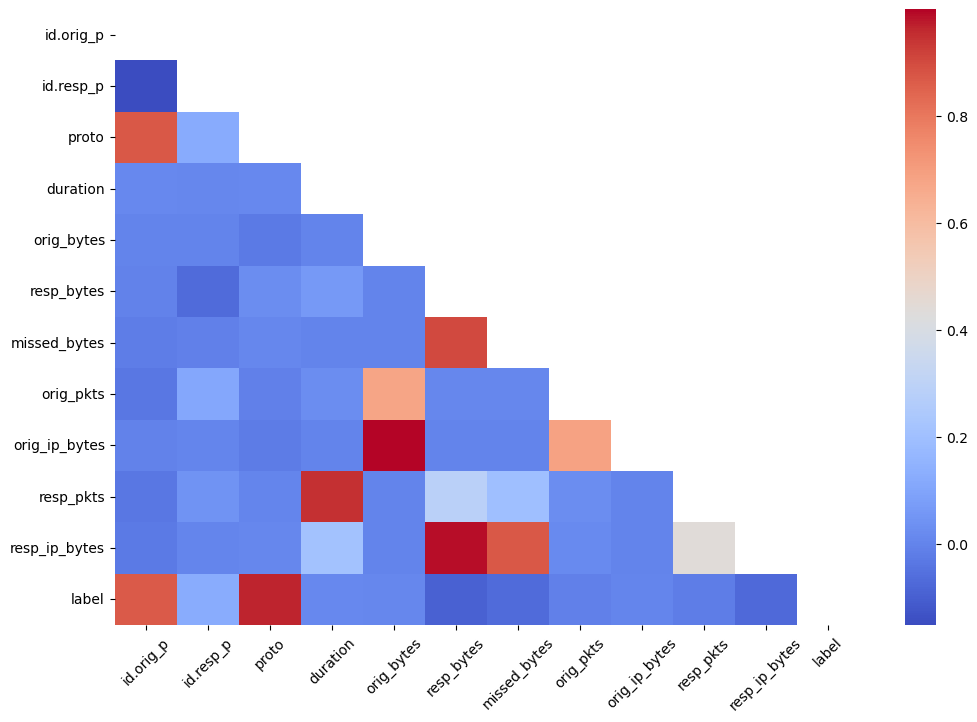

In [34]:
plt.figure(figsize=(12, 8))

corr = cleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(cleaned.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f")

plt.xticks(rotation=45)

### I was just curious if I could view this data in a different way, so I grouped the columns and printed the values. At this point I'm basically finished with the EDA but am trying some different angles of attack to see if I can yield anything else.

In [35]:
grouped = cleaned.groupby(['label', 'proto']).size().reset_index(name='count')

In [36]:
max_proto_counts = grouped.loc[grouped.groupby('label')['count'].idxmax()]

In [37]:
print(grouped)

   label  proto  count
0      0      0   1812
1      0      1    111
2      1      0      2
3      1      1  21220


#### Maybe a ratio would be useful?

In [38]:
data['byte_ratio'] = data['orig_bytes'] / (data['resp_bytes'] + 1)  # Avoid division by zero
data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,byte_ratio
0,192.168.1.195,41040,185.244.25.235,80,1,NaN,0.052320,0.0,0.0,S0,0,S,3,180,0,0,0,0.000000
1,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0,NaN
2,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0,NaN
3,192.168.1.195,41040,185.244.25.235,80,1,http,0.024628,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,0,0.001162
4,192.168.1.195,41042,185.244.25.235,80,1,NaN,0.052452,0.0,0.0,S0,0,S,3,180,0,0,0,0.000000


#### Let's try this isolationforest thing.

It's the same as the scatterplot.

c:\Users\dave9\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


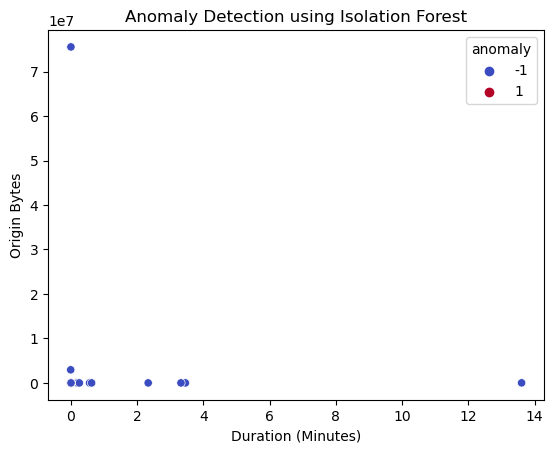

In [39]:
from sklearn.ensemble import IsolationForest

# Ensure 'duration' and 'orig_bytes' exist and are not null
required_columns = ['duration', 'orig_bytes']
data = data[required_columns + [col for col in data.columns if col not in required_columns]].dropna(subset=required_columns)

# Convert duration to minutes
data['duration'] = data['duration'] / 60

# Select numerical data for the model
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Fit the IsolationForest model
iso_forest = IsolationForest(contamination=0.1)
data['anomaly'] = iso_forest.fit_predict(numerical_data)

# Ensure 'duration' and 'orig_bytes' are used for plotting
if 'duration' in data.columns and 'orig_bytes' in data.columns:
    sns.scatterplot(data=data, x='duration', y='orig_bytes', hue='anomaly', palette='coolwarm')
    plt.title('Anomaly Detection using Isolation Forest')
    plt.xlabel('Duration (Minutes)')
    plt.ylabel('Origin Bytes')
    plt.show()
else:
    print("Columns 'duration' and 'orig_bytes' must exist in the DataFrame.")


#### A network map would definitely show what I'm trying to convey about the NAT configuration.

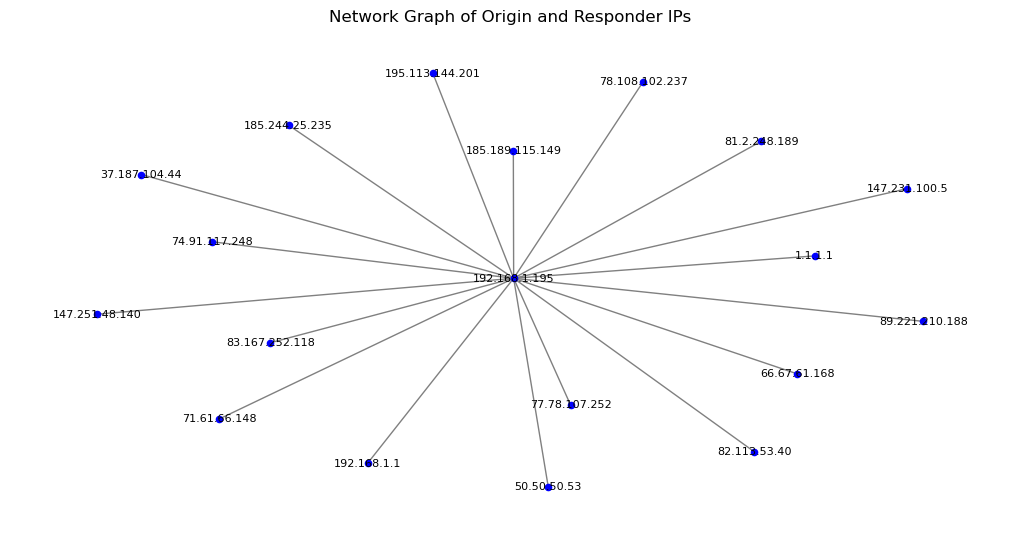

In [40]:
import networkx as nx

G = nx.from_pandas_edgelist(data, 'id.orig_h', 'id.resp_h', ['duration'])
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=20, node_color='blue', font_size=8, edge_color='gray')
plt.title('Network Graph of Origin and Responder IPs')
plt.show()

#### Trying a pivot table heatmap to see if I missed something.

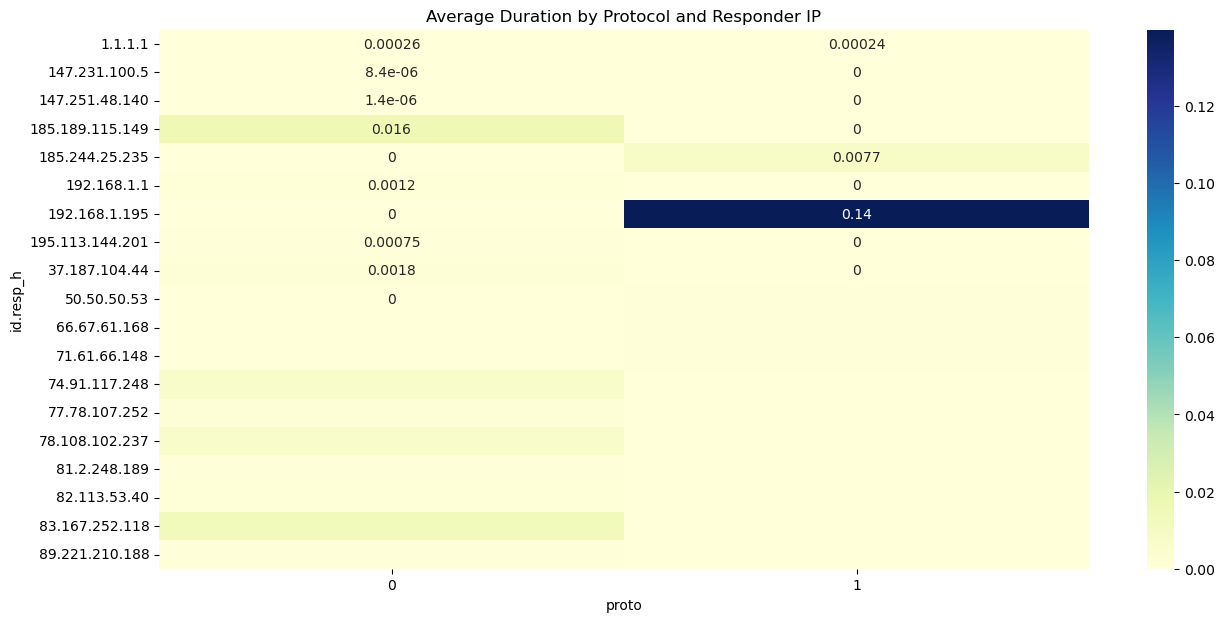

In [41]:
pivot_table = data.pivot_table(values='duration', index='id.resp_h', columns='proto', aggfunc='mean').fillna(0)
plt.figure(figsize=(15, 7))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Average Duration by Protocol and Responder IP')
plt.show()

#### ipinfo geolocation finder for the IP addresses, I removed my token. Register for a new token at ipinfo.io

It looks like they are all in Derry, UK. This is what I expected, as the responder IPs are all accessed through the router IP and are obviously on the same network. It's a useful tool though.

In [42]:
import ipinfo

# Replace 'your_access_token' with your actual IPinfo access token
access_token = 'insert token here'
handler = ipinfo.getHandler(access_token)


# Function to get geolocation data for an IP address
def get_geolocation(ip):
    try:
        if pd.isna(ip):
            return {
                'latitude': None,
                'longitude': None,
                'country': None,
                'city': None
            }
        details = handler.getDetails(ip)
        return {
            'latitude': details.all.get('latitude'),
            'longitude': details.all.get('longitude'),
            'country': details.all.get('country_name'),
            'city': details.all.get('city')
        }
    except Exception as e:
        return {
            'latitude': None,
            'longitude': None,
            'country': None,
            'city': None
        }

# Apply the function to the DataFrame
geolocation_data = data['id.resp_h'].apply(get_geolocation)
geolocation_df = pd.DataFrame(geolocation_data.tolist())
data = pd.concat([data, geolocation_df], axis=1)

for idx, row in geolocation_df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    city = row['city']
    country = row['country']
    if latitude is not None and longitude is not None:
        print(f"IP Address: {data['id.resp_h'][idx]}, City: {city}, Country: {country}, Latitude: {latitude}, Longitude: {longitude}")
    else:
        print(f"IP Address: {data['id.resp_h'][idx]} has incomplete geolocation data.")

KeyboardInterrupt: 